In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
training_data_folder_path = r"C:\Users\amans\OneDrive\Desktop\project\dataset\training-data"
test_data_folder_path = r"C:\Users\amans\OneDrive\Desktop\project\dataset\test-data"

In [3]:
def detect_face(input_img):
    gray_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5)

    if len(faces) == 0:
        return None, None
    faces = sorted(faces, key=lambda rect: rect[2] * rect[3], reverse=True)
    x, y, w, h = faces[0]
    return gray_img[y:y+h, x:x+w], faces[0]



In [4]:
def prepare_training_data(training_data_folder_path):
    detected_faces = []
    train_faces=[]
    face_labels = []
    values=[]
    traning_image_dirs = os.listdir(training_data_folder_path)
    for dir_name in traning_image_dirs:
        label = int(dir_name)
        training_image_path = training_data_folder_path + "/" + dir_name
        training_images_names = os.listdir(training_image_path)

        for image_name in training_images_names:
            image_path = training_image_path  + "/" + image_name
            label1 = image_name
            image = cv2.imread(image_path)
            face, rect = detect_face(image)
            if face is not None:
              resized_face = cv2.resize(face, (121,121), interpolation=cv2.INTER_AREA)
              detected_faces.append(resized_face)  
              face_labels.append(label)
              values.append(label1)
            train_faces.append(  image_path )



    return detected_faces, face_labels

In [5]:
detected_faces, face_labels = prepare_training_data(training_data_folder_path)

In [6]:
print("Total faces: ", len(detected_faces))
print("Total labels: ", len(face_labels))
print(face_labels)

Total faces:  113
Total labels:  113
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7]


In [7]:
lbphfaces_recognizer = cv2.face.LBPHFaceRecognizer_create(radius=1, neighbors=8)

In [8]:

fisherfaces_recognizer = cv2.face.FisherFaceRecognizer_create()


In [9]:
lbphfaces_recognizer.train(detected_faces, np.array(face_labels))

In [10]:
fisherfaces_recognizer.train(detected_faces, np.array(face_labels))

In [11]:
def draw_rectangle(test_image, rect):
    (x, y, w, h) = rect
    cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

def draw_text(test_image, label_text, x, y):
    cv2.putText(test_image, label_text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

In [12]:
tags1 = ['Junichiro_Koizumi', 'Alvaro_Uribe', 'George_Robertson', 'George Bush', 'Atal Bajpai','Amelia Vega','Ana Guevara','Mayank Semwal']
tags = ['0', '1', '2', '3', '4','5','6','7']

In [13]:
def load_test_data(test_data_folder_path):
    test_faces = []
    test_labels = []
    values=[]
    test_image_dirs = os.listdir(test_data_folder_path)
    for dir_name in test_image_dirs:
        label = int(dir_name)
        test_image_path = test_data_folder_path + "/" + dir_name
        test_images_names = os.listdir(test_image_path)

        for image_name in test_images_names:
            image_path = test_image_path  + "/" + image_name
            label1 = image_name
            image = cv2.imread(image_path)
            test_faces.append(  image_path )
            test_labels.append(label)



    return test_faces, test_labels

In [14]:
def predict(test_image):
    face, rect = detect_face(test_image)
    if face is not None and face.any():
        label= lbphfaces_recognizer.predict(face)
        label_text = tags[label[0]]
        draw_rectangle(test_image, rect)
        draw_text(test_image, label_text, rect[0], rect[1]-5)
        return test_image, label_text
    else:
        return None,None


In [15]:
def predict1(test_image):
    face, rect = detect_face(test_image)
    if face is not None and face.any():
        label= fisherfaces_recognizer.predict(face)
        label_text = tags[label[0]]
        draw_rectangle(test_image, rect)
        draw_text(test_image, label_text, rect[0], rect[1]-5)
        return test_image, label_text
    else:
        return None,None


In [16]:
def calculate_accuracy(test_images, test_labels):

  correct_predictions = 0
  c=0
  total_predictions = len(test_images)
  print(total_predictions)
  for test_img, true_label in zip(test_images, test_labels):
    t_image = cv2.imread(test_img)
    _ , p_label = predict(t_image)
    print(p_label, true_label)
    print(p_label == tags[true_label])
    if p_label == tags[true_label]:
      correct_predictions += 1

  print(correct_predictions, total_predictions)
  accuracy = (correct_predictions / total_predictions) * 100
  print(correct_predictions)
  return accuracy

In [17]:
def calculate_accuracy1(test_images, test_labels):

  correct_predictions = 0
  c=0
  total_predictions = len(test_images)
  print(total_predictions)
  for test_img, true_label in zip(test_images, test_labels):
    t_image = cv2.imread(test_img)
    _ , p_label = predict1(t_image)
    print(p_label, true_label)
    print(p_label == tags[true_label])
    if p_label == tags[true_label]:
      correct_predictions += 1

  print(correct_predictions, total_predictions)
  accuracy = (correct_predictions / total_predictions) * 100
  print(correct_predictions)
  return accuracy

In [18]:
test_images, test_labels = load_test_data(test_data_folder_path)

In [19]:
print(test_labels)

[0, 0, 1, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6, 7]


In [20]:
predicted_labels=[]
for test_image_path in test_images:
    test_image = cv2.imread(test_image_path) 
    _, label = predict(test_image)  
    predicted_labels.append(label)

In [21]:
print(predicted_labels)

['0', '0', '1', '1', '2', '2', '3', '3', '7', '4', '4', '5', '5', '6', '1', '4']


In [22]:
print("Total faces: ", len(test_images))
print("Total labels: ", len(test_labels))
print(test_images)
print(test_labels)

Total faces:  16
Total labels:  16
['C:\\Users\\amans\\OneDrive\\Desktop\\project\\dataset\\test-data/0/Junichiro_Koizumi_0021.jpg', 'C:\\Users\\amans\\OneDrive\\Desktop\\project\\dataset\\test-data/0/Junichiro_Koizumi_0022.jpg', 'C:\\Users\\amans\\OneDrive\\Desktop\\project\\dataset\\test-data/1/Alvaro_Uribe_0021.jpg', 'C:\\Users\\amans\\OneDrive\\Desktop\\project\\dataset\\test-data/1/Alvaro_Uribe_0022.jpg', 'C:\\Users\\amans\\OneDrive\\Desktop\\project\\dataset\\test-data/2/George_Robertson_0021.jpg', 'C:\\Users\\amans\\OneDrive\\Desktop\\project\\dataset\\test-data/2/George_Robertson_0022.jpg', 'C:\\Users\\amans\\OneDrive\\Desktop\\project\\dataset\\test-data/3/George_W_Bush_0021.jpg', 'C:\\Users\\amans\\OneDrive\\Desktop\\project\\dataset\\test-data/3/George_W_Bush_0022.jpg', 'C:\\Users\\amans\\OneDrive\\Desktop\\project\\dataset\\test-data/3/licensed-image.jpeg', 'C:\\Users\\amans\\OneDrive\\Desktop\\project\\dataset\\test-data/4/Atal_Bihari_Vajpayee_0021.jpg', 'C:\\Users\\amans\

In [23]:
accuracy = calculate_accuracy(test_images, test_labels)

print(f"Accuracy for lbph: {accuracy:.2f}%")

16
0 0
True
0 0
True
1 1
True
1 1
True
2 2
True
2 2
True
3 3
True
3 3
True
7 3
False
4 4
True
4 4
True
5 5
True
5 5
True
6 6
True
1 6
False
4 7
False
13 16
13
Accuracy for lbph: 81.25%


In [24]:
accuracy = calculate_accuracy(test_images, test_labels)

print(f"Accuracy for fisherface: {accuracy:.2f}%")

16
0 0
True
0 0
True
1 1
True
1 1
True
2 2
True
2 2
True
3 3
True
3 3
True
7 3
False
4 4
True
4 4
True
5 5
True
5 5
True
6 6
True
1 6
False
4 7
False
13 16
13
Accuracy for fisherface: 81.25%


In [25]:
test_image = cv2.imread(test_images[14])

In [26]:
print(test_image)

[[[ 70  96 110]
  [ 69  95 109]
  [ 69  95 109]
  ...
  [ 69  92 107]
  [ 69  92 107]
  [ 69  92 107]]

 [[ 70  96 110]
  [ 69  95 109]
  [ 69  95 109]
  ...
  [ 67  90 105]
  [ 67  90 105]
  [ 67  90 105]]

 [[ 69  95 109]
  [ 68  94 108]
  [ 67  93 107]
  ...
  [ 68  90 102]
  [ 68  90 102]
  [ 68  90 102]]

 ...

 [[125 162 190]
  [128 165 193]
  [131 167 197]
  ...
  [120 175 190]
  [105 156 172]
  [ 95 146 162]]

 [[126 160 190]
  [129 163 193]
  [133 167 197]
  ...
  [142 185 202]
  [127 170 185]
  [122 163 178]]

 [[125 159 189]
  [128 162 192]
  [132 166 196]
  ...
  [159 197 215]
  [163 199 215]
  [156 192 208]]]


In [27]:
predicted_image, label = predict(test_image)

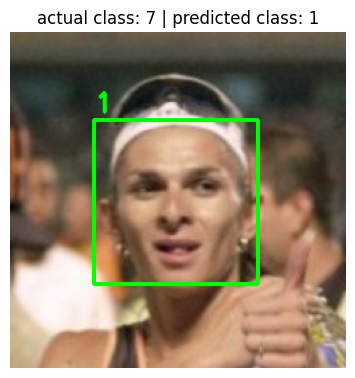

In [28]:
fig = plt.figure()
ax1 = fig.add_axes((0.1, 0.2, 0.8, 0.7))
ax1.set_title('actual class: ' + tags[7]+ ' | ' + 'predicted class: ' + label)
plt.axis("off")
imgplot = plt.imshow(cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB))
plt.show()

In [29]:
import sklearn
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score

test_labels = np.array(test_labels)  
predicted_labels = np.array(predicted_labels)  

if test_labels.dtype != predicted_labels.dtype:
    
    test_labels = test_labels.astype(predicted_labels.dtype)

precision = precision_score(test_labels, predicted_labels, average='macro')
recall = recall_score(test_labels, predicted_labels, average='macro')

f1_manual = 2 * (precision * recall) / (precision + recall)
f1 = f1_score(test_labels, predicted_labels,average='macro')
acc = accuracy_score(test_labels, predicted_labels)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score (manual calculation):", f1_manual)
print("F1 score (sklearn):", f1)
print(f"Accuracy: {acc*100}%")

Precision: 0.7916666666666666
Recall: 0.7708333333333333
F1 score (manual calculation): 0.781111111111111
F1 score (sklearn): 0.7583333333333333
Accuracy: 81.25%


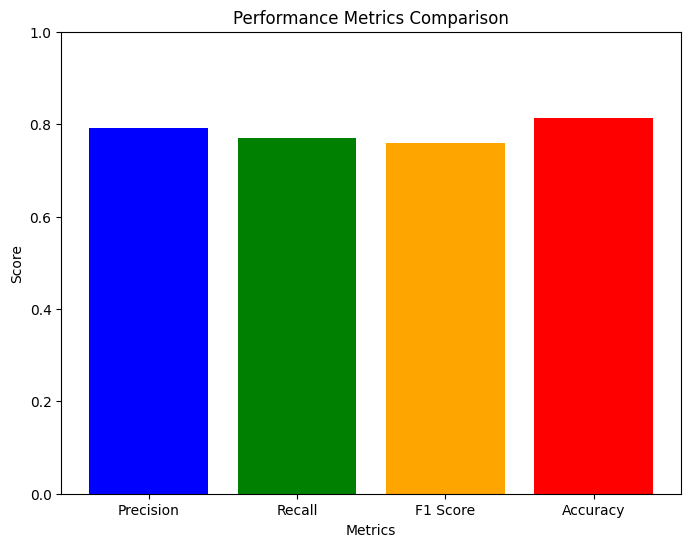

In [30]:
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values = [precision, recall, f1, acc]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Performance Metrics Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit for scores between 0 and 1
plt.show()

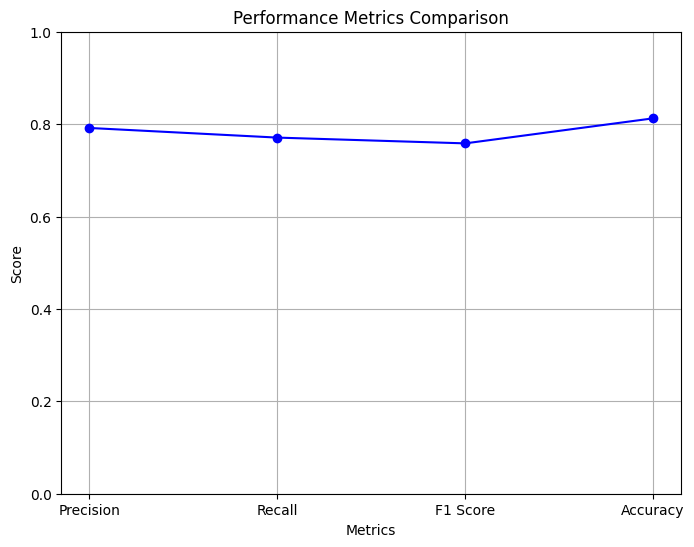

In [31]:
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values = [precision, recall, f1, acc]

# Create a line plot for each metric
plt.figure(figsize=(8, 6))
plt.plot(metrics, values, marker='o', linestyle='-', color='blue')
plt.title('Performance Metrics Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.grid(True)
plt.ylim(0, 1)  # Set y-axis limit for scores between 0 and 1
plt.show()

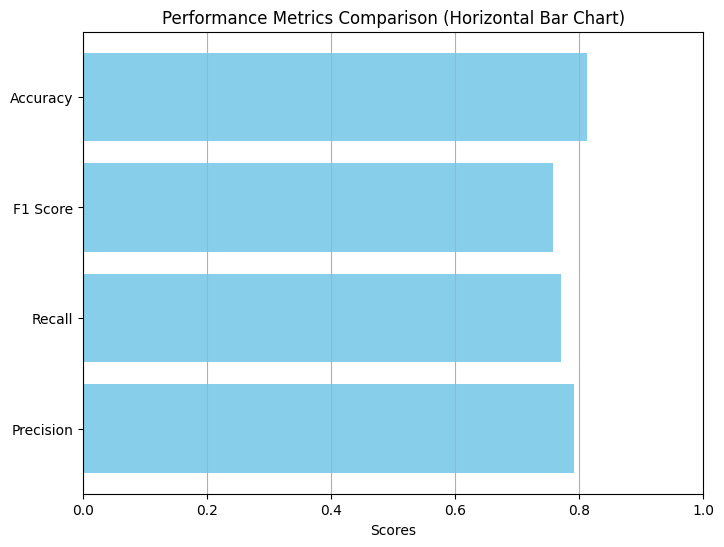

In [32]:
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
values = [precision, recall, f1, acc]

# Create a horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(metrics, values, color='skyblue')
plt.xlabel('Scores')
plt.title('Performance Metrics Comparison (Horizontal Bar Chart)')
plt.xlim(0, 1)  # Set x-axis limit for scores between 0 and 1
plt.grid(axis='x')
plt.show()

In [33]:
def capture_faces():
   
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    cap = cv2.VideoCapture(0)

    cv2.namedWindow('Captured Faces', cv2.WINDOW_NORMAL)

    count = 0 
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab a frame")
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
        if len(faces) == 0:
            continue
        
        predicted_image, label = predict(frame)
        if(label==None):
            continue
          
        print(label)
        for (x, y, w, h) in faces:
            
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            face_img = gray[y:y+h, x:x+w]
            cv2.imwrite(f"captured_faces/face_{count}.jpg", face_img)
            count += 1
            
        cv2.imshow('Captured Faces', frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            cap.release()
            cv2.destroyAllWindows()
            break

capture_faces()


1
1
4
1
2
1
1
1
4
4
4
4
2
4
4
4
4
4
0
2
4
4
4
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
2
2
2
2
2
7
7
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
7
7
7
2
2
7
2
2
2
2
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
2
2
2
2
7
7
7
2
2
2
2
2
2
2
2
2
2
2
0
0
0
2
7
7
7
4
4
4
2
2
2
3
2
2
2
2
2
2
2
2
2
7
7
2
2
7
7
2
7
7
7
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
7
2
2
2
7
7
7
7
7
7
7
7
7
7
2
2
2
2
2
2
0
2
2
2
0
2
2
7
2
7
7
7
2
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
2
1
1
3
4
4
4
4
1
2
2
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
2
7
7
7
7
7
7
7
2
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
2
7
7
7
7
7
7
7
7
7
7
7
7
2
2
2
2
2
7
7
3
2
3
3
7
7
7
7
7
2
7
7
2
2
3
2
3
7
2
3
7
7
3
7
7
2
2
7
7
7
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
2
2
2
2
2
2
2
2
2
2
2
7
7
7
7
7
7
0
1
1
3
3
7
7
0
2
3
7
7
2
